In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
#nltk.download()

[nltk_data] Downloading package stopwords to
[nltk_data]     U:\Users\jk026110\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 1. tekstin lataaminen ja käsittely

In [2]:
with open('speeches/2017-Trump.txt', 'r', encoding='latin-1') as file:  # speeches/2017-Trump.txt  mobydick.txt
    text = file.read()
print(text)

Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: Thank you.

We, the citizens of America, are now joined in a great national effort to rebuild our country and restore its promise for all of our people. Together, we will determine the course of America and the world for many, many years to come. We will face challenges, we will confront hardships, but we will get the job done.

Every 4 years, we gather on these steps to carry out the orderly and peaceful transfer of power, and we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition. They have been magnificent. Thank you.

Today's ceremony, however, has very special meaning. Because today we are not merely transferring power from one administration to another or from one party to another, but we are transferring power from Washington, DC, and giving it back to you, the people.

For too long, a 

In [ ]:
for c in ['.',',',':',';',"'"]: # omat lisäykset ,"'"
    text = text.replace(c, '')
print(text)

Chief Justice Roberts President Carter President Clinton President Bush President Obama fellow Americans and people of the world Thank you

We the citizens of America are now joined in a great national effort to rebuild our country and restore its promise for all of our people Together we will determine the course of America and the world for many many years to come We will face challenges we will confront hardships but we will get the job done

Every 4 years we gather on these steps to carry out the orderly and peaceful transfer of power and we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition They have been magnificent Thank you

Todays ceremony however has very special meaning Because today we are not merely transferring power from one administration to another or from one party to another but we are transferring power from Washington DC and giving it back to you the people

For too long a small group in our Nations Capit

In [4]:
tokens = text.split()
tokens=[token.lower() for token in tokens if token.isalpha()]
print(tokens)

['chief', 'justice', 'roberts', 'president', 'carter', 'president', 'clinton', 'president', 'bush', 'president', 'obama', 'fellow', 'americans', 'and', 'people', 'of', 'the', 'world', 'thank', 'you', 'we', 'the', 'citizens', 'of', 'america', 'are', 'now', 'joined', 'in', 'a', 'great', 'national', 'effort', 'to', 'rebuild', 'our', 'country', 'and', 'restore', 'its', 'promise', 'for', 'all', 'of', 'our', 'people', 'together', 'we', 'will', 'determine', 'the', 'course', 'of', 'america', 'and', 'the', 'world', 'for', 'many', 'many', 'years', 'to', 'come', 'we', 'will', 'face', 'challenges', 'we', 'will', 'confront', 'hardships', 'but', 'we', 'will', 'get', 'the', 'job', 'done', 'every', 'years', 'we', 'gather', 'on', 'these', 'steps', 'to', 'carry', 'out', 'the', 'orderly', 'and', 'peaceful', 'transfer', 'of', 'power', 'and', 'we', 'are', 'grateful', 'to', 'president', 'obama', 'and', 'first', 'lady', 'michelle', 'obama', 'for', 'their', 'gracious', 'aid', 'throughout', 'this', 'transition

In [5]:
freq = nltk.FreqDist(tokens) 
for key,val in freq.items(): 
    print ("%30s %5d" % (str(key), val))


                         chief     1
                       justice     1
                       roberts     1
                     president     5
                        carter     1
                       clinton     1
                          bush     1
                         obama     3
                        fellow     1
                     americans     4
                           and    76
                        people    10
                            of    48
                           the    71
                         world     6
                         thank     4
                           you    14
                            we    46
                      citizens     4
                       america    19
                           are    13
                           now     6
                        joined     1
                            in    14
                             a    15
                         great     6
                      national     2
 

In [6]:
freq.most_common(10)

[('and', 76),
 ('the', 71),
 ('of', 48),
 ('our', 48),
 ('we', 46),
 ('will', 43),
 ('to', 37),
 ('is', 20),
 ('america', 19),
 ('a', 15)]

# 2. pysäytyssanat

In [7]:
#löytyymyös suomeksi
stop_words = stopwords.words("english")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
ctokens = [token for token in tokens if token not in stop_words]
print(ctokens)


['chief', 'justice', 'roberts', 'president', 'carter', 'president', 'clinton', 'president', 'bush', 'president', 'obama', 'fellow', 'americans', 'people', 'world', 'thank', 'citizens', 'america', 'joined', 'great', 'national', 'effort', 'rebuild', 'country', 'restore', 'promise', 'people', 'together', 'determine', 'course', 'america', 'world', 'many', 'many', 'years', 'come', 'face', 'challenges', 'confront', 'hardships', 'get', 'job', 'done', 'every', 'years', 'gather', 'steps', 'carry', 'orderly', 'peaceful', 'transfer', 'power', 'grateful', 'president', 'obama', 'first', 'lady', 'michelle', 'obama', 'gracious', 'aid', 'throughout', 'transition', 'magnificent', 'thank', 'todays', 'ceremony', 'however', 'special', 'meaning', 'today', 'merely', 'transferring', 'power', 'one', 'administration', 'another', 'one', 'party', 'another', 'transferring', 'power', 'washington', 'dc', 'giving', 'back', 'people', 'long', 'small', 'group', 'nations', 'capital', 'reaped', 'rewards', 'government', '

In [9]:
import seaborn as sns
import pandas as pd

freq2 = nltk.FreqDist(ctokens) 
for key, val in freq2.items(): 
    print ("%30s %5d" % (str(key), val))

freq2.most_common(10)


                         chief     1
                       justice     1
                       roberts     1
                     president     5
                        carter     1
                       clinton     1
                          bush     1
                         obama     3
                        fellow     1
                     americans     4
                        people    10
                         world     6
                         thank     4
                      citizens     4
                       america    19
                        joined     1
                         great     6
                      national     2
                        effort     1
                       rebuild     1
                       country     9
                       restore     1
                       promise     1
                      together     4
                     determine     1
                        course     1
                          many     5
 

[('america', 19),
 ('american', 11),
 ('people', 10),
 ('country', 9),
 ('one', 8),
 ('every', 7),
 ('world', 6),
 ('great', 6),
 ('back', 6),
 ('nation', 6)]

In [106]:
import plotly.express as px

# Create a dataframe for the most common words
common_words_df = pd.DataFrame(freq2.most_common(40), columns=['Word', 'Count'])

# Create a treeplot
fig = px.treemap(common_words_df, path=['Word'], values='Count', title='Most Common Words')
fig.show()

# 3. Sanan vartalo

In [11]:
stemmer = PorterStemmer()
for i in range(len(ctokens)):
    ctokens[i] = stemmer.stem(ctokens[i])
print(ctokens)

['chief', 'justic', 'robert', 'presid', 'carter', 'presid', 'clinton', 'presid', 'bush', 'presid', 'obama', 'fellow', 'american', 'peopl', 'world', 'thank', 'citizen', 'america', 'join', 'great', 'nation', 'effort', 'rebuild', 'countri', 'restor', 'promis', 'peopl', 'togeth', 'determin', 'cours', 'america', 'world', 'mani', 'mani', 'year', 'come', 'face', 'challeng', 'confront', 'hardship', 'get', 'job', 'done', 'everi', 'year', 'gather', 'step', 'carri', 'orderli', 'peac', 'transfer', 'power', 'grate', 'presid', 'obama', 'first', 'ladi', 'michel', 'obama', 'graciou', 'aid', 'throughout', 'transit', 'magnific', 'thank', 'today', 'ceremoni', 'howev', 'special', 'mean', 'today', 'mere', 'transfer', 'power', 'one', 'administr', 'anoth', 'one', 'parti', 'anoth', 'transfer', 'power', 'washington', 'dc', 'give', 'back', 'peopl', 'long', 'small', 'group', 'nation', 'capit', 'reap', 'reward', 'govern', 'peopl', 'born', 'cost', 'washington', 'flourish', 'peopl', 'share', 'wealth', 'politician',

# 4. Sanan perusmuoto

In [12]:
# nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
for i in range(len(ctokens)):
    ctokens[i] = lemmatizer.lemmatize(ctokens[i])

print(ctokens)

['chief', 'justic', 'robert', 'presid', 'carter', 'presid', 'clinton', 'presid', 'bush', 'presid', 'obama', 'fellow', 'american', 'peopl', 'world', 'thank', 'citizen', 'america', 'join', 'great', 'nation', 'effort', 'rebuild', 'countri', 'restor', 'promis', 'peopl', 'togeth', 'determin', 'cours', 'america', 'world', 'mani', 'mani', 'year', 'come', 'face', 'challeng', 'confront', 'hardship', 'get', 'job', 'done', 'everi', 'year', 'gather', 'step', 'carri', 'orderli', 'peac', 'transfer', 'power', 'grate', 'presid', 'obama', 'first', 'ladi', 'michel', 'obama', 'graciou', 'aid', 'throughout', 'transit', 'magnific', 'thank', 'today', 'ceremoni', 'howev', 'special', 'mean', 'today', 'mere', 'transfer', 'power', 'one', 'administr', 'anoth', 'one', 'parti', 'anoth', 'transfer', 'power', 'washington', 'dc', 'give', 'back', 'peopl', 'long', 'small', 'group', 'nation', 'capit', 'reap', 'reward', 'govern', 'peopl', 'born', 'cost', 'washington', 'flourish', 'peopl', 'share', 'wealth', 'politician',

In [13]:
with open('positive-words.txt', 'r') as file:
    pos = file.read().split()
print(pos)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [14]:
with open('negative-words.txt', 'r') as file:
    neg = file.read().split()
print(neg)

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

In [15]:
countpositive = countnegative = countneutral = counttotal = 0

for token in ctokens:
    counttotal += 1
    cat = ""

    if token in pos:
        cat = cat + 'POS'
        countpositive += 1

    elif token in neg:
        cat = cat + 'NEG'
        countnegative += 1
    else:
        countneutral += 1
    print(f"{token} {cat}")

chief 
justic 
robert 
presid 
carter 
presid 
clinton 
presid 
bush 
presid 
obama 
fellow 
american 
peopl 
world 
thank POS
citizen 
america 
join 
great POS
nation 
effort 
rebuild 
countri 
restor 
promis 
peopl 
togeth 
determin 
cours 
america 
world 
mani 
mani 
year 
come 
face 
challeng 
confront NEG
hardship NEG
get 
job 
done 
everi 
year 
gather 
step 
carri 
orderli 
peac 
transfer 
power 
grate NEG
presid 
obama 
first 
ladi 
michel 
obama 
graciou 
aid 
throughout 
transit 
magnific 
thank POS
today 
ceremoni 
howev 
special 
mean 
today 
mere 
transfer 
power 
one 
administr 
anoth 
one 
parti 
anoth 
transfer 
power 
washington 
dc 
give 
back 
peopl 
long 
small 
group 
nation 
capit 
reap 
reward POS
govern 
peopl 
born 
cost 
washington 
flourish POS
peopl 
share 
wealth 
politician 
prosper POS
job 
left 
factori 
close 
establish 
protect POS
citizen 
countri 
victori 
victori 
triumph POS
triumph POS
celebr 
nation 
capit 
littl 
celebr 
struggl 
famili 
across 

In [16]:
import math
print(f"Positive: {countpositive} ({countpositive/counttotal*100:.2f}%)")
print(f"Negative: {countnegative} ({countnegative/counttotal*100:.2f}%)")
print(f"Neutral: {countneutral} ({countneutral/counttotal*100:.2f}%)")
print(f"Total: {counttotal}\n")

print(f"positiveness: {math.log(countpositive/countnegative):.2f}%")
print(f"affecaffection: {1-(countneutral/counttotal):.2f}%")

Positive: 66 (9.28%)
Negative: 19 (2.67%)
Neutral: 626 (88.05%)
Total: 711

positiveness: 1.25%
affecaffection: 0.12%


# 7. Sanaluokkien tunnistus

In [17]:
nltk.download('punkt_tab')
tokens2 = nltk.word_tokenize(text)
tokens2

[nltk_data] Downloading package punkt_tab to
[nltk_data]     U:\Users\jk026110\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['Chief',
 'Justice',
 'Roberts',
 'President',
 'Carter',
 'President',
 'Clinton',
 'President',
 'Bush',
 'President',
 'Obama',
 'fellow',
 'Americans',
 'and',
 'people',
 'of',
 'the',
 'world',
 'Thank',
 'you',
 'We',
 'the',
 'citizens',
 'of',
 'America',
 'are',
 'now',
 'joined',
 'in',
 'a',
 'great',
 'national',
 'effort',
 'to',
 'rebuild',
 'our',
 'country',
 'and',
 'restore',
 'its',
 'promise',
 'for',
 'all',
 'of',
 'our',
 'people',
 'Together',
 'we',
 'will',
 'determine',
 'the',
 'course',
 'of',
 'America',
 'and',
 'the',
 'world',
 'for',
 'many',
 'many',
 'years',
 'to',
 'come',
 'We',
 'will',
 'face',
 'challenges',
 'we',
 'will',
 'confront',
 'hardships',
 'but',
 'we',
 'will',
 'get',
 'the',
 'job',
 'done',
 'Every',
 '4',
 'years',
 'we',
 'gather',
 'on',
 'these',
 'steps',
 'to',
 'carry',
 'out',
 'the',
 'orderly',
 'and',
 'peaceful',
 'transfer',
 'of',
 'power',
 'and',
 'we',
 'are',
 'grateful',
 'to',
 'President',
 'Obama',
 'and'

In [18]:
nltk.download('averaged_perceptron_tagger_eng')
tagged = nltk.pos_tag(tokens2)
tagged

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     U:\Users\jk026110\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('Chief', 'JJ'),
 ('Justice', 'NNP'),
 ('Roberts', 'NNP'),
 ('President', 'NNP'),
 ('Carter', 'NNP'),
 ('President', 'NNP'),
 ('Clinton', 'NNP'),
 ('President', 'NNP'),
 ('Bush', 'NNP'),
 ('President', 'NNP'),
 ('Obama', 'NNP'),
 ('fellow', 'JJ'),
 ('Americans', 'NNPS'),
 ('and', 'CC'),
 ('people', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('Thank', 'NNP'),
 ('you', 'PRP'),
 ('We', 'PRP'),
 ('the', 'DT'),
 ('citizens', 'NNS'),
 ('of', 'IN'),
 ('America', 'NNP'),
 ('are', 'VBP'),
 ('now', 'RB'),
 ('joined', 'VBN'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('national', 'JJ'),
 ('effort', 'NN'),
 ('to', 'TO'),
 ('rebuild', 'VB'),
 ('our', 'PRP$'),
 ('country', 'NN'),
 ('and', 'CC'),
 ('restore', 'VB'),
 ('its', 'PRP$'),
 ('promise', 'NN'),
 ('for', 'IN'),
 ('all', 'DT'),
 ('of', 'IN'),
 ('our', 'PRP$'),
 ('people', 'NNS'),
 ('Together', 'NNP'),
 ('we', 'PRP'),
 ('will', 'MD'),
 ('determine', 'VB'),
 ('the', 'DT'),
 ('course', 'NN'),
 ('of', 'IN'),
 ('America', 'NNP

In [19]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     U:\Users\jk026110\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     U:\Users\jk026110\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


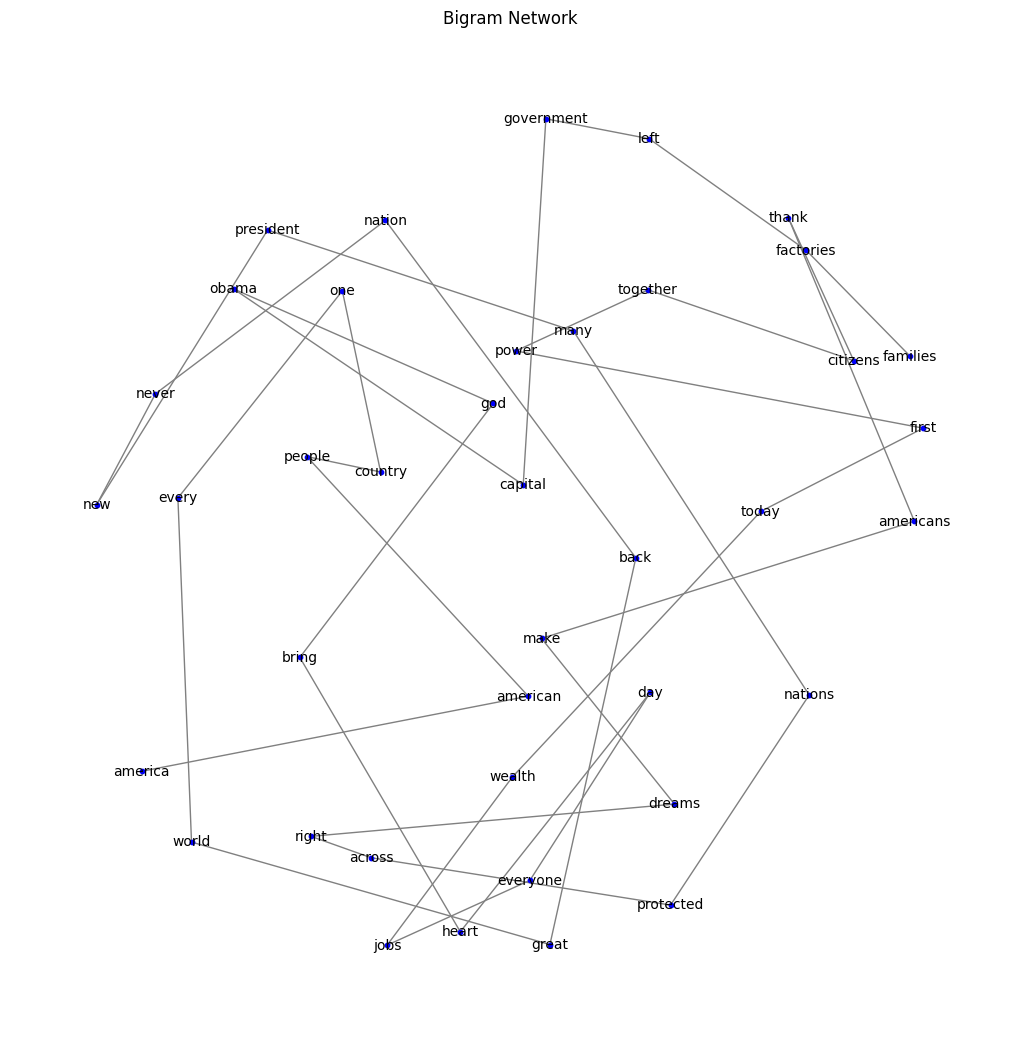

In [91]:
# Bigram Network

import networkx as nx
from nltk import bigrams
from collections import Counter

import matplotlib.pyplot as plt

# Create bigrams from the tokens

import random

yleisimmat_sanat = []

for sana in common_words_df['Word']: # luetaan yleisimmät sanat listaan
    yleisimmat_sanat.append(sana)

bigrams_list = list(bigrams(yleisimmat_sanat))

# Count the frequency of each bigram
bigram_counts = Counter(bigrams_list)

# Create a graph
G = nx.Graph()

# Add edges and weights to the graph
for bigram, count in bigram_counts.items():
    G.add_edge(bigram[0], bigram[1], weight=count)

# Draw the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, node_size=10, font_size=10, edge_color='gray', node_color='blue', alpha=1)
plt.title('Bigram Network')
plt.show()

In [92]:
from nltk.corpus import treebank
#nltk.download('treebank')
t = treebank.parsed_sents('wsj_0001.mrg')[1]
t.draw()

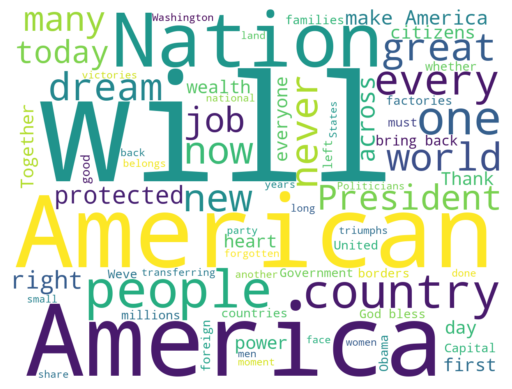

In [103]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join tokens2 to create a single string
text_for_wordcloud = ' '.join(tokens2)

# Generate the word cloud with additional settings
wc = WordCloud(max_words=70, background_color='white', colormap='viridis', width=1200, height=900).generate(text_for_wordcloud)

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

